In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import matplotlib.ticker as ticker

# 데이터 불러오기

In [46]:
df_n = pd.read_csv('./data/개별기업뉴스_자연어처리/AJ네트웍스.csv',index_col=0)
df_n['뉴스'] = df_n['뉴스'].apply(lambda x : eval(x))
df_n.index = pd.to_datetime(df_n.index)

# 키워드 분석

## 특정구간

In [ ]:
# 특정구간 단어 빈도수 + 시각화
kw_dict = dict()

# 2016-01-01 ~ 2016-02-01 가정
bgn_date = '2016-01-01'
end_date = '2016-02-01'

token_lst = df_n['뉴스'].loc[bgn_date:end_date]

for tokens in token_lst:

    for word in tokens:
        if not word in kw_dict.keys():
            kw_dict[word] = 1
        else:
            kw_dict[word] += 1

kw_dict = dict(sorted(kw_dict.items(), key = lambda x: x[1]))

plt.figure(figsize=(15,10))
keyword_list = list(kw_dict.keys())
keyword_count = list(kw_dict.values())
plt.barh(keyword_list,keyword_count)
plt.show()

## 특정구간: period_kw_count()

In [53]:
def period_kw_count(df, bgn_date,end_date):
    kw_dict = dict()
    token_lst = df_n['뉴스'].loc[bgn_date:end_date]

    for tokens in token_lst:

        for word in tokens:
            if not word in kw_dict.keys():
                kw_dict[word] = 1
            else:
                kw_dict[word] += 1

    kw_dict = dict(sorted(kw_dict.items(), key = lambda x: x[1]))
    
    
    plt.figure(figsize=(10,10))
    # 축 눈금설정
    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    keyword_list = list(kw_dict.keys())
    keyword_count = list(kw_dict.values())
    plt.xticks
    plt.barh(keyword_list,keyword_count)
    plt.show()
    
    return kw_dict


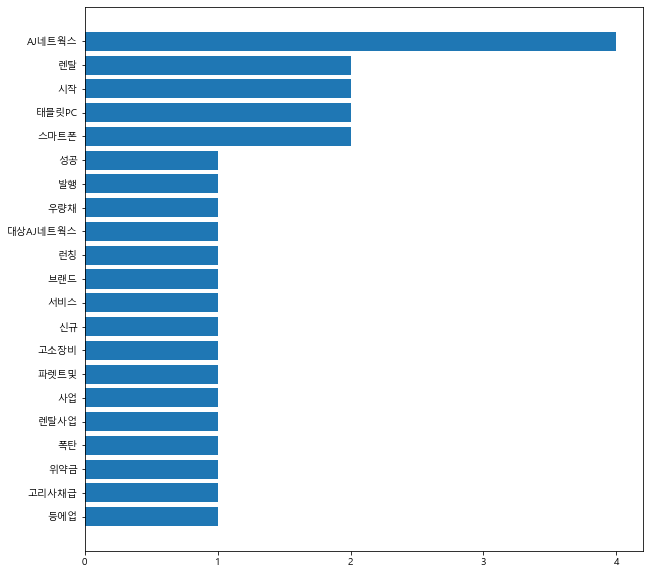

{'등에업': 1,
 '고리사채급': 1,
 '위약금': 1,
 '폭탄': 1,
 '렌탈사업': 1,
 '사업': 1,
 '파렛트및': 1,
 '고소장비': 1,
 '신규': 1,
 '서비스': 1,
 '브랜드': 1,
 '런칭': 1,
 '대상AJ네트웍스': 1,
 '우량채': 1,
 '발행': 1,
 '성공': 1,
 '스마트폰': 2,
 '태블릿PC': 2,
 '시작': 2,
 '렌탈': 2,
 'AJ네트웍스': 4}

In [48]:
period_kw_count(df_n,'2016-01-01','2016-02-01')

## 전체구간

In [ ]:
kw_dict1 = dict()

# 2016-01-01 ~ 2022-03-31
bgn_date = '2016-01-01'
end_date = '2022-03-31'

token_lst = df_n['뉴스'].loc[bgn_date:end_date]

for tokens in token_lst:

    for word in tokens:
        if not word in kw_dict1.keys():
            kw_dict1[word] = 1
        else:
            kw_dict1[word] += 1

kw_dict1 = dict(sorted(kw_dict1.items(), key = lambda x: x[1]))

kw_dict1

In [ ]:
# 1단어 제거
for key,value in list(kw_dict2.items()):
    if value ==1 :
        del kw_dict2[key]

In [ ]:
# 본인 회사이름 제거
for key,value in list(kw_dict2.items()):
    if 'AJ네트웍스' in key :
        del kw_dict2[key]
kw_dict2

In [ ]:
# 뽑은 불용어 제거
df_nsw = pd.read_csv('./data/뉴스불용어.csv',index_col=1)
df_nsw.reset_index(drop=True, inplace=True)

for key,value in list(kw_dict2.items()):
    for word in df_nsw['불용어']:
        if word == key :
                del kw_dict2[key]


## 전체구간 : total_kw_dict()

In [101]:
# 전처리된 뉴스
df_n = pd.read_csv('./data/개별기업뉴스_자연어처리/AJ네트웍스.csv',index_col=0)
df_n['뉴스'] = df_n['뉴스'].apply(lambda x : eval(x))
df_n.index = pd.to_datetime(df_n.index)

# 불용어 모음파일
df_nsw = pd.read_csv('./data/뉴스불용어.csv',index_col=1)
df_nsw.reset_index(drop=True, inplace=True)

def total_kw_dict(df_news,corp_name, bgn_date = '2016-01-01',end_date = '2022-03-31'):
    kw_dict1 = dict()

    # 2016-01-01 ~ 2022-03-31
    bgn_date = '2016-01-01'
    end_date = '2022-03-31'

    token_lst = df_news['뉴스'].loc[bgn_date:end_date]

    for tokens in token_lst:

        for word in tokens:
            if not word in kw_dict1.keys():
                kw_dict1[word] = 1
            else:
                kw_dict1[word] += 1

    kw_dict1 = dict(sorted(kw_dict1.items(), key = lambda x: x[1]))
    
    # 4번 이하 출현 단어 제거
    for key,value in list(kw_dict1.items()):
        if value < 5 :
            del kw_dict1[key]
            
    # 본인 회사이름 제거
    for key,value in list(kw_dict1.items()):
        if corp_name in key :
            del kw_dict1[key]
    
    # 불용어 제거
    for key,value in list(kw_dict1.items()):
        for word in df_nsw['불용어']:
            if word == key :
                del kw_dict1[key]
            
    return kw_dict1
    

In [98]:
kw_dict1 = total_kw_dict(df_news=df_n, corp_name='AJ네트웍스')
kw_dict1

{'렌탈사업': 5,
 '순매도한달누적': 5,
 '영업익': 5,
 '주가등락폭': 5,
 '영업이익': 5,
 '일일회전율': 5,
 '투자주체': 5,
 '상승세': 5,
 '분석': 5,
 '지분변동': 5,
 '레드도로와철도운송': 5,
 '규모': 5,
 '사업부': 5,
 '외국인기관': 5,
 '수요예측': 6,
 '수요': 6,
 '신고': 6,
 '파렛트': 6,
 '사장': 6,
 '특별관계': 6,
 '원도로와철도운송': 6,
 'AJ셀카': 6,
 '순매수행진': 6,
 '박대현': 6,
 '발행': 7,
 '순매도': 7,
 '순매수한달누적': 7,
 '매출': 7,
 '동양': 7,
 '동양도로와철도운송': 7,
 '대표': 8,
 '윤규선': 8,
 '코스피': 8,
 '종목동정': 8,
 '공시': 8,
 '인적분할': 8,
 '개인': 9,
 '파크': 9,
 '대표이사': 9,
 '외국인': 10,
 '지주부문': 10,
 '정배열': 11,
 '경신': 12,
 '매각': 12,
 '지분': 12,
 '하락': 12,
 '사업': 13,
 '변동폭': 14,
 '렌터카': 14,
 '대량': 14,
 '장중수급포착': 14,
 '매매동향': 15,
 '렌탈': 16,
 '외국': 16,
 '단기중기': 16,
 '자회사': 18,
 '회사채': 19,
 '기관': 27,
 '도로와철도운송': 51,
 '상승': 71,
 '상승률': 89}

In [41]:
# 전처리된 뉴스
df_n = pd.read_csv('./data/개별기업뉴스_자연어처리/SPC삼립.csv',index_col=0)
df_n['뉴스'] = df_n['뉴스'].apply(lambda x : eval(x))
df_n.index = pd.to_datetime(df_n.index)

In [42]:
kw_dict_cj = total_kw_dict(df_news=df_n)
kw_dict_cj.keys()

dict_keys(['매입', '샌드팜', '반등', '식음료', '빠오즈', '토종', '정통', '회장', '건강빵', '로만밀', '식사빵', '식단', '허영인', '인사SPC삼립', '세트', '불법파견', '신선편의식품', '도약', '획득', '이헌상', '선물SPC삼립', '그릭', '도전장SPC삼립', '마케팅', '송편', '만만원대', '계절', '신상품', '캐릭터', '잇츠', '빵값', '크래프트', '하인즈', '계약', '프리미엄', '푸드', '편의점', '불티', '변신', '몸집', '그릭슈바인빚', '추석선물세트', '누적판매', '수익성', '선봬', '저스트', '식물성', '인사', '황종현씨', '외SPC삼립', '펭수빵', '샌드위치', '대리점', '인상', '한국', '반영', '사람', '억원잠정실적SPC삼립', '모멘텀', '부재', '환경', '밀키트', '회복', '돼지', '식감', '시작', '외국인기관', '시즌', '공매', '종목SPC삼립', '추진', '풍부', '베이커리', '맷돌', '잠정실적SPC삼립', '순매수만주', '성장기', '육즙가득', '부어스트', '김박사', '선정', '진행', '출시모델', '전년비', '실적년', '달성영업익', '호조SPC삼립', '고공행진', '탄력', '선봬SPC삼립', '오늘일', '추천주', '전략', '프로모션', '품절', '대란', '강세SPC삼립', '인기에SPC삼립', '방긋SPC삼립', '재출시', '판매량', '대외변수', '부담', '오픈', '선택', '쫄깃한', '사업다각화', '종합식품기업', '바캉스', '디저트', '선임SPC삼립', '선임', '달성', '국고처', '육가공', '채용', '소식', '양산빵', '커리', '추억', '정성', '기대', '삼립', '제품', '개월', '건강', '샐러드', '식빵', '온라인', '명물', '분기누적', '이익', '강세', '하이투자증권', '외국', '전망', '신고

In [43]:
len(kw_dict_cj.keys())

238

# 전체구간 키워드 빈도 데이터: total_kw_count_data()

In [100]:
df_keyword = pd.DataFrame()
keyword_lst = list(kw_dict1.keys())

for keyword in keyword_lst:
    # 출현 날짜
    rp_date = []
    # 날짜당 출현 횟수
    cnt_list = []

    df_rp = df_n['뉴스'].loc[bgn_date:end_date]

    for i in df_rp.index:
        # 날짜
        rp_date.append(i)
        # 횟수
        cnt = 0
        tokens = df_n['뉴스'].loc[i]
        for token in tokens:
            if keyword in token:
                cnt +=1

        cnt_list.append(cnt)

    df_rp = pd.DataFrame({'날짜':rp_date, '출현횟수':cnt_list})
    df_rp = df_rp.set_index('날짜')
    df_keyword = pd.concat([df_keyword,df_rp],axis=1)
    
df_keyword.columns = keyword_lst
df_keyword

In [102]:
def total_kw_count_data(kw_dict, df_news, bgn_date = '2016-01-01',end_date = '2022-03-31'):
    
    df_keyword = pd.DataFrame()
    keyword_lst = list(kw_dict.keys())

    for keyword in keyword_lst:
        # 출현 날짜
        rp_date = []
        # 날짜당 출현 횟수
        cnt_list = []

        df_rp = df_news['뉴스'].loc[bgn_date:end_date]

        for i in df_rp.index:
            # 날짜
            rp_date.append(i)
            # 횟수
            cnt = 0
            tokens = df_n['뉴스'].loc[i]
            for token in tokens:
                if keyword in token:
                    cnt +=1

            cnt_list.append(cnt)

        df_rp = pd.DataFrame({'날짜':rp_date, '출현횟수':cnt_list})
        df_rp = df_rp.set_index('날짜')
        df_keyword = pd.concat([df_keyword,df_rp],axis=1)
    
    df_keyword.columns = keyword_lst
        
    return df_keyword

In [37]:
%%time
total_kw_count_data(kw_dict=kw_dict1,df_news=df_n)

Wall time: 9.82 s


,스마트폰,태블릿PC,시작,신규,성공,자존심,수익성,서비스업업종,통합,등락폭,...,매매동향,렌탈,외국,단기중기,자회사,회사채,기관,도로와철도운송,상승,상승률
날짜,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-05,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# (완성) 모든파일 키워드 빈도데이터

## (1)뉴스

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import matplotlib.ticker as ticker

In [103]:
# 불용어 모음파일
df_nsw = pd.read_csv('./data/뉴스불용어.csv',index_col=1)
df_nsw.reset_index(drop=True, inplace=True)

df_n = pd.read_csv('./data/개별기업뉴스_자연어처리/AJ네트웍스.csv',index_col=0)
df_n['뉴스'] = df_n['뉴스'].apply(lambda x : eval(x))
df_n.index = pd.to_datetime(df_n.index)
df_n.head()

,뉴스제목,뉴스
2016-01-01,NaN,[]
2016-01-02,NaN,[]
2016-01-03,NaN,[]
2016-01-04,"AJ네트웍스, SKB 등에업고 '고리사채급 위약금 폭탄'","[AJ네트웍스, 등에업, 고리사채급, 위약금, 폭탄]"
2016-01-05,"AJ네트웍스, 스마트폰, 태블릿PC 렌탈사업 시작","[AJ네트웍스, 스마트폰, 태블릿PC, 렌탈사업, 시작]"


## (완성) 뉴스

In [105]:
# 불용어 모음파일
df_nsw = pd.read_csv('./data/뉴스불용어.csv',index_col=1)
df_nsw.reset_index(drop=True, inplace=True)

path = './data/개별기업뉴스_자연어처리/'

for file in file_list[:]:
    corp_name = file[:-4]
    file_path = os.path.join(path,file)
    
    df_n = pd.read_csv(file_path,index_col=0)
    df_n['뉴스'] = df_n['뉴스'].apply(lambda x : eval(x))
    df_n.index = pd.to_datetime(df_n.index)
    
    # 1.키워드 딕셔너리
    kw_dict = total_kw_dict(df_news=df_n,corp_name=corp_name)
    # 2.키워드 빈도수 데이터
    df_count = total_kw_count_data(kw_dict= kw_dict, df_news=df_n)
    
    df_count.to_csv('./data/데이터_뉴스키워드빈도/{}.csv'.format(corp_name))
    